In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos,sin,pi,sqrt
from numpy import arange, zeros, array, loadtxt
from pylab import imshow, xlabel,ylabel, plot, show, legend,grid

las funciones de Bessel en forma integral estan definidas como:

\begin{equation}
J_{m}(x)=\frac{1}{x}\int_{0}^{\pi }cos(m\theta-xsen\theta)d\theta 
\end{equation}

Donde m y x son enteros no negativos 

Se hallaran las funciones de Bessel  de orden 0, 1 y 2 usando la regla de Simpson con 1000 puntos,  luego se graficaran las funciones en un intervalo desde x= 0 a x=20 

In [4]:
#función a integrar
def func(m,x,the):
    return (1/pi)*cos(m*the-x*sin(the)) 

In [5]:
# funcion de Bessel 
def Jm(x,m):
    
    a=0
    b=pi
    fa=func(m,x,a)
    fb=func(m,x,b)
    N=1000   #numero de puntos
    h=(b-a)/N
    Si=0
    Sp=0
    for k in range ((N//2)+1):  #Regla de Simpson
        Si+=func(m,x,a+(2*k-1)*h)
        if k <(N//2): 
            Sp+=func(m,x,a+(2*k*h))
    
    return (h/3)*(fa+fb+4*Si+2*Sp)

In [6]:
# listas en las que se guardan los valores de las funciones de Bessel de orden 0,1 y 2
x=[]  #posiciones
J0=[] # función de Bessel 0
J1=[] # función de Bessel 1
J2=[] # función de Bessel 2
for i in np.arange (0,21,0.1):
    x.append(i)
    J0.append(Jm(i,0))
    J1.append(Jm(i,1))
    J2.append(Jm(i,2))

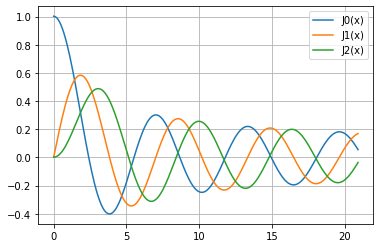

In [17]:
plt.plot(x,J0, label='J0(x)')
plt.plot(x,J1, label='J1(x)')
plt.plot(x,J2, label='J2(x)')
legend(loc='upper right')
grid ('on')
plt.show()

Ahora se hará un gráfico de la intensidad  de un patrón de difracción circular producido por una fuente de luz con longitud de onda de 500 nm, en una región cuadrada del plano focal para un valor de r de 0 a 1 micrometros. La exprecion para la intesidad es:
    
\begin{equation}    
I=\left ( \frac{J_{m}(kr)}{kr} \right )^{2}
\end{equation}  

Donde k es el numero de onda y r es la distancia radial en el plano focal que va desde el centro del patrón de difracción

In [20]:
l=0.5 #micrometros (longitud de onda)
k=(2*pi)/l #numero de onda
x0=0.5
y0=0.5
rmax=1 #micrometros
rmin=0 
d=rmax-rmin #dimension
p=0.01 #paso (100 puntos)

def int(r):     
    return (Jm(k*r,1)/(k*r))**2    #funcion que calcula la intensidad

Creamos un archivo para guardar los valores de la intensidad en función de la posición para la función de Bessel de orden 1. Para esto es útil recordar que:

\begin{equation}    
\lim_{x \to 0} \frac{J_{1}(x)}{x}=\frac{1}{2}
\end{equation} 



In [13]:
inten=open("intensidad.dat", "w")

for i in np.arange(0,d,p ):
    for j in np.arange(0,d,p):
        R = sqrt(((j-x0)**2)+((i-y0)**2))  # r en funcion de x e y
        if R==0:
            inten.write("%0.3f " % (1/4)) # cuando x tiene a cero Jm(x)/x tiene a 1/2
        else:
            inten.write("%0.3f " % (int(R)))
        
    inten.write("\n") #salto de lineal para guardar los valores para otra x
    
inten.close()

Graficamos el patrón de interferencia leyendo los datos del archivo creado anteriormente

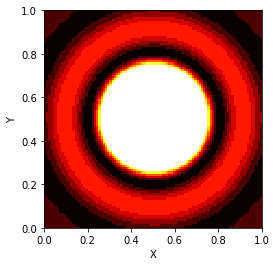

In [15]:
data = loadtxt("intensidad.dat", float)
imshow(data, origin="lower", extent=[0,1, 0,1],vmax=0.01, cmap="hot")
xlabel("X")
ylabel("Y")
show()